<a href="https://colab.research.google.com/github/DurdonaOK/Machine-Learning/blob/main/Life_Expectency_Using_K_Means.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [37]:
# importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [38]:
# importing the dataset
dataset = pd.read_csv("life_expectancy.csv")

In [39]:
# getting the dummies
dataset = pd.get_dummies(dataset)

In [40]:
# checking for missing data
print(dataset.isnull().sum())

Sum of Females  Life Expectancy         0
Sum of Life Expectancy  (both sexes)    0
Sum of Males  Life Expectancy           0
Country_Afghanistan                     0
Country_Albania                         0
                                       ..
Country_Vietnam                         0
Country_Western Sahara                  0
Country_Yemen                           0
Country_Zambia                          0
Country_Zimbabwe                        0
Length: 203, dtype: int64


In [41]:
# scaling the data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
dataset_scaled = sc.fit_transform(dataset)

In [42]:
# fitting PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=2, random_state=0)
dataset_pca = pca.fit_transform(dataset_scaled)

In [43]:
# K-means on PCA
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, random_state=0)
labels = kmeans.fit_predict(dataset_pca)

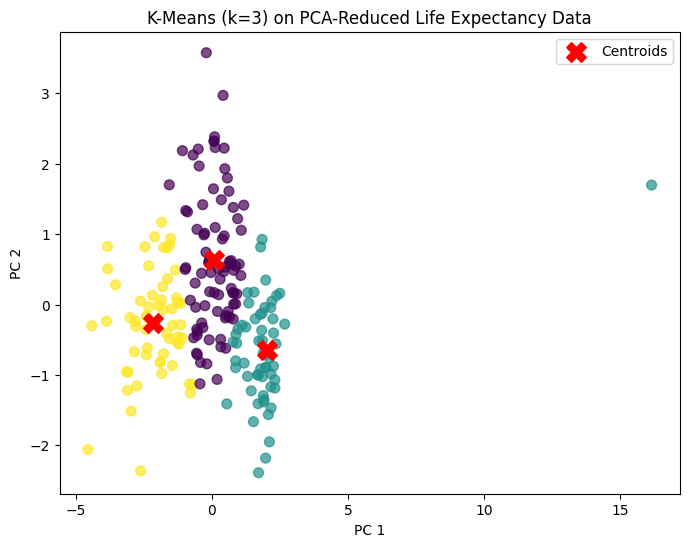

In [44]:
# visualizing
plt.figure(figsize=(8, 6))
plt.scatter(
    dataset_pca[:, 0], dataset_pca[:, 1],
    c=labels,
    cmap='viridis',
    s=50,
    alpha=0.7
)

# Plot centroids
centroids = kmeans.cluster_centers_
plt.scatter(
    centroids[:, 0], centroids[:, 1],
    c='red', marker='X', s=200, label='Centroids'
)

plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.title(f'K-Means (k=3) on PCA-Reduced Life Expectancy Data')
plt.legend()
plt.show()